In [2]:
# Mohd Muttalib

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data = pd.read_csv('Mall_Customers.csv')
data.shape

(200, 5)

In [4]:
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [5]:
data.tail()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18
199,200,Male,30,137,83


In [6]:
data.sample(3)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
66,67,Female,43,48,50
22,23,Female,46,25,5
0,1,Male,19,15,39


In [7]:
data.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [8]:
data.describe(include = 'object')

,Gender
count,200
unique,2
top,Female
freq,112


In [9]:
data.isnull().any().any()

False

C:\Users\MOHD MUTTALIB\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

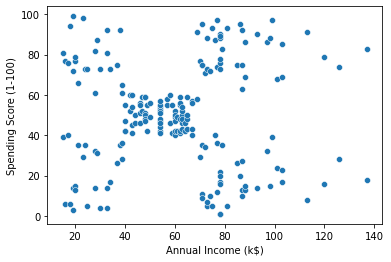

In [10]:
sns.scatterplot(data['Annual Income (k$)'],data['Spending Score (1-100)'])

In [11]:
x=data.loc[:,['Annual Income (k$)',
             'Spending Score (1-100)']].values
print(x.shape)

(200, 2)


In [12]:
x_data  = pd.DataFrame(x)
x_data.head()

,0,1
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


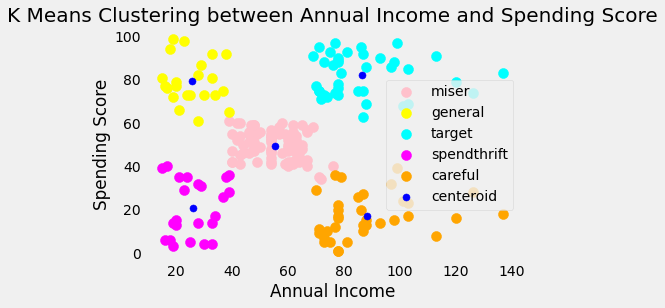

In [14]:
# lets visualize these clusters
from sklearn.cluster import KMeans
plt.style.use('fivethirtyeight')

km = KMeans(n_clusters = 5, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_means = km.fit_predict(x)

plt.scatter(x[y_means == 0, 0], x[y_means == 0, 1], s = 100, c = 'pink', label = 'miser')
plt.scatter(x[y_means == 1, 0], x[y_means == 1, 1], s = 100, c = 'yellow', label = 'general')
plt.scatter(x[y_means == 2, 0], x[y_means == 2, 1], s = 100, c = 'cyan', label = 'target')
plt.scatter(x[y_means == 3, 0], x[y_means == 3, 1], s = 100, c = 'magenta', label = 'spendthrift')
plt.scatter(x[y_means == 4, 0], x[y_means == 4, 1], s = 100, c = 'orange', label = 'careful')
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:, 1], s = 50, c = 'blue' , label = 'centeroid')

plt.style.use('fivethirtyeight')
plt.title('K Means Clustering between Annual Income and Spending Score', fontsize = 20)
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.legend()
plt.grid()
plt.show()

In [15]:
from sklearn.metrics import silhouette_score
score = silhouette_score(x,km.labels_,metric='euclidean')
print('silhoutte score:%.3f' % score)

silhoutte score:0.554


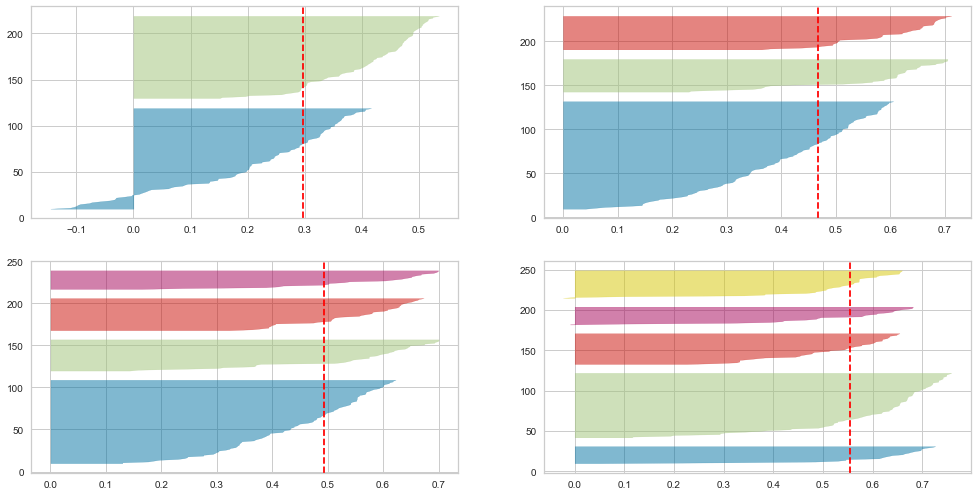

In [16]:
from yellowbrick.cluster import SilhouetteVisualizer
fig,ax = plt.subplots(2,2,figsize=(15,8))
for i in [2,3,4,5]:
    km = KMeans(n_clusters=i,init='k-means++',n_init=10,max_iter=100,random_state=42)
    q,mod=divmod(i,2)
    visualizer=SilhouetteVisualizer(km,colors='yellowbrick',ax=ax[q-1][mod])
    visualizer.fit(x)

In [17]:
x=data.loc[:,['Annual Income (k$)',
             'Spending Score (1-100)']].values
print(x.shape)

(200, 2)


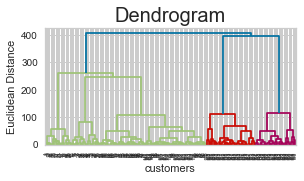

In [23]:
import scipy.cluster.hierarchy as sch
plt.rcParams['figure.figsize']=(4,2)
dendrogram=sch.dendrogram(sch.linkage(x,method='ward'))
plt.title('Dendrogram',fontsize=20)
plt.xlabel('customers')
plt.ylabel('Euclidean Distance')
plt.show()


In [25]:
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 5,affinity = 'euclidean',linkage='ward')
y_hc=hc.fit_predict(x)

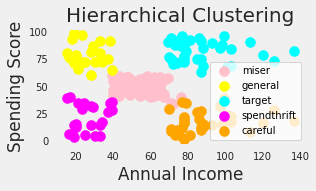

In [27]:
plt.scatter(x[y_means == 0, 0], x[y_means == 0, 1], s = 100, c = 'pink', label = 'miser')
plt.scatter(x[y_means == 1, 0], x[y_means == 1, 1], s = 100, c = 'yellow', label = 'general')
plt.scatter(x[y_means == 2, 0], x[y_means == 2, 1], s = 100, c = 'cyan', label = 'target')
plt.scatter(x[y_means == 3, 0], x[y_means == 3, 1], s = 100, c = 'magenta', label = 'spendthrift')
plt.scatter(x[y_means == 4, 0], x[y_means == 4, 1], s = 100, c = 'orange', label = 'careful')

plt.style.use('default')
plt.rcParams['figure.figsize']=(15,5)
plt.title('Hierarchical Clustering', fontsize = 20)
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.legend()
plt.grid()
plt.show()